In [10]:
import numpy as np 
import pandas as pd
import os
from Dataset.Utils import prepare_data_range
from Dataset.Resample import resample

In [2]:
embeds_paths = "/mnt/d/ML/Kaggle/CAFA6-new/Dataset/t5_embeds/train_embeds.npy"
ids_paths = "/mnt/d/ML/Kaggle/CAFA6-new/Dataset/t5_embeds/train_ids.npy"


In [3]:
BASE_PATH = "/mnt/d/ML/Kaggle/CAFA6/cafa-6-protein-function-prediction/"
train_terms_df = pd.read_csv(os.path.join(BASE_PATH, 'Train/train_terms.tsv'), sep='\t')
print(f"Training terms loaded. Shape: {train_terms_df.shape}")
train_fasta_path = os.path.join(BASE_PATH, 'Train/train_sequences.fasta')



# loading embeddings
print("Loading training embeddings...")
train_embeds = np.load(embeds_paths) 
train_ids = np.load(ids_paths)
print(f"Training embeddings loaded. Shape: {train_embeds.shape}")

Training terms loaded. Shape: (537027, 3)
Loading training embeddings...
Training embeddings loaded. Shape: (142246, 1024)


In [4]:
data = prepare_data_range(train_terms_df, train_ids, train_embeds, top_range=[0,64])

In [5]:
data.keys()

dict_keys(['entries', 'embeds', 'labels', 'mlb', 'top_terms', 'num_classes'])

In [6]:
(data['embeds']).shape

(62711, 1024)

In [8]:
(data['labels']).shape

(62711, 64)

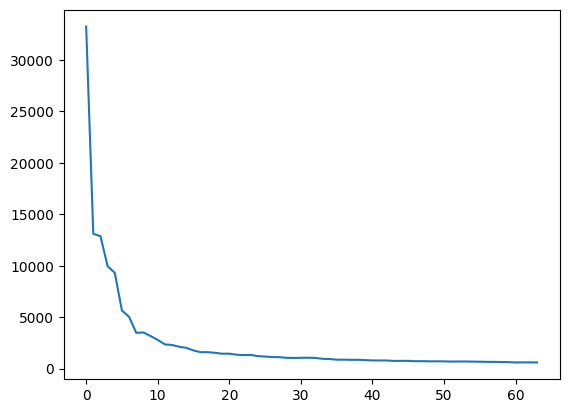

In [20]:
import matplotlib.pyplot as plt
plt.plot(data['labels'].sum(axis=0))

In [12]:
sampled_idx = resample(data, train_terms_df, strategy='log_pos', I=100000)


In [ ]:
sampled_idx = np.array(sampled_idx)


array([35442, 56563, 14250, ..., 34842, 46658, 35482], shape=(100000,))

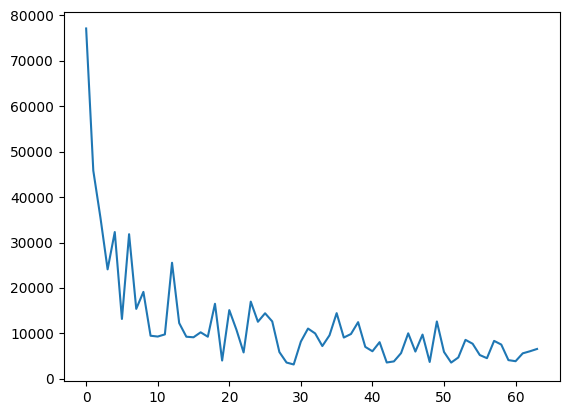

In [23]:
#plot sampled distribution
plt.plot(data['labels'][sampled_idx].sum(axis=0))